# Graph 2 Table Pt 2 - Extract Data


In [1]:
from PIL import Image
from IPython.display import display
from pathlib import Path

## EDA 

Take a quick look at the images

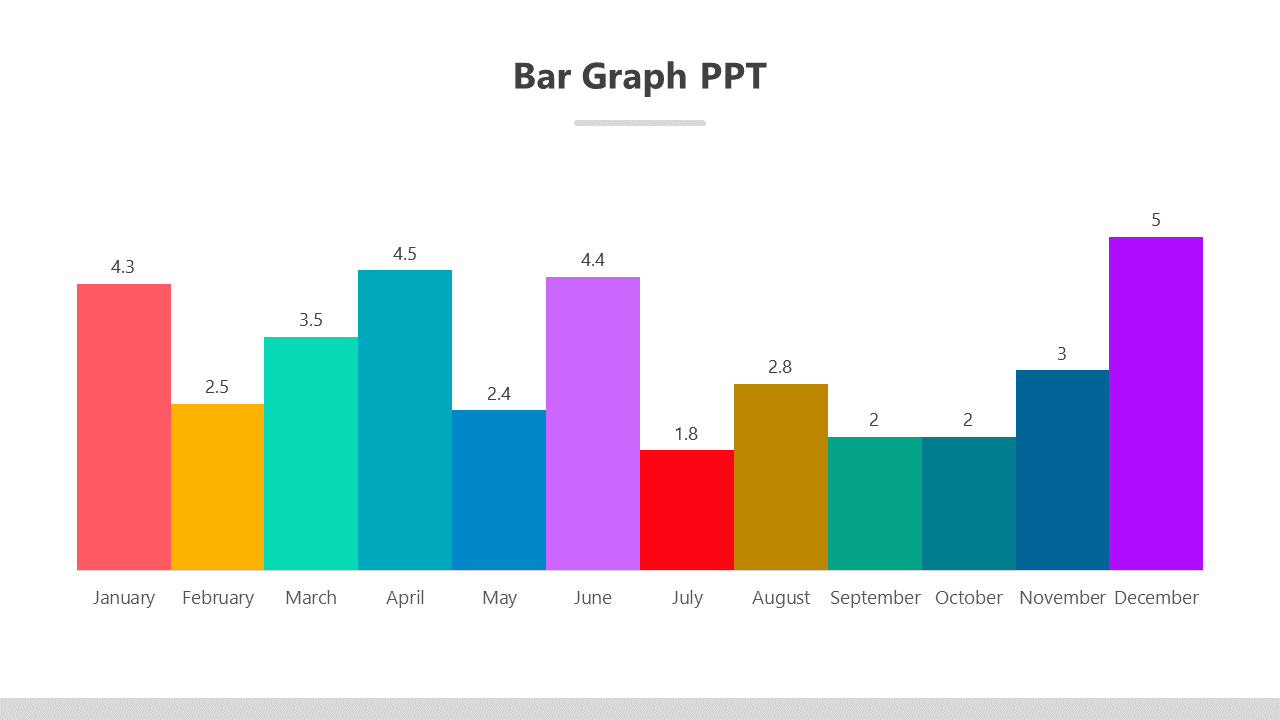

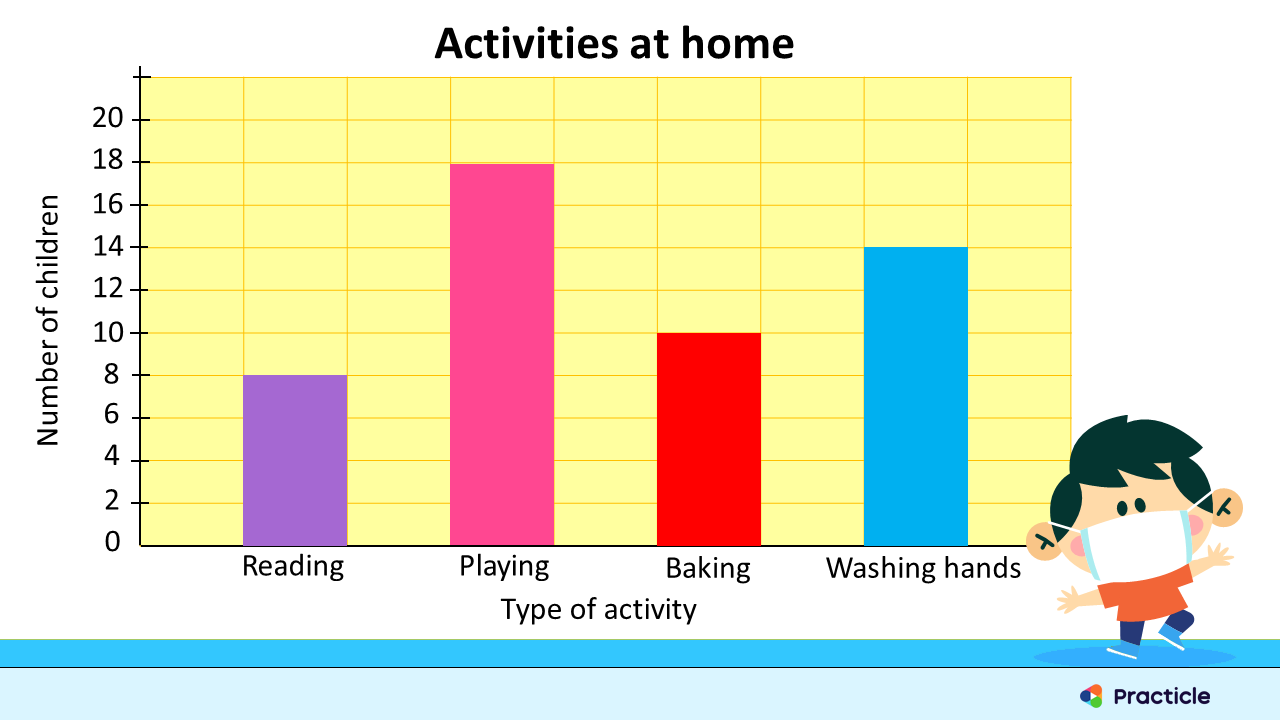

In [2]:
sample0 = Path('./datasets/dataset_part2/image_1.png')
sample1 = Path('./datasets/dataset_part2/image_2.png')
img0 = Image.open(sample0)
img1 = Image.open(sample1)
display(img0)
display(img1)

## Text Extraction image_1

### Extract axes, values, titles

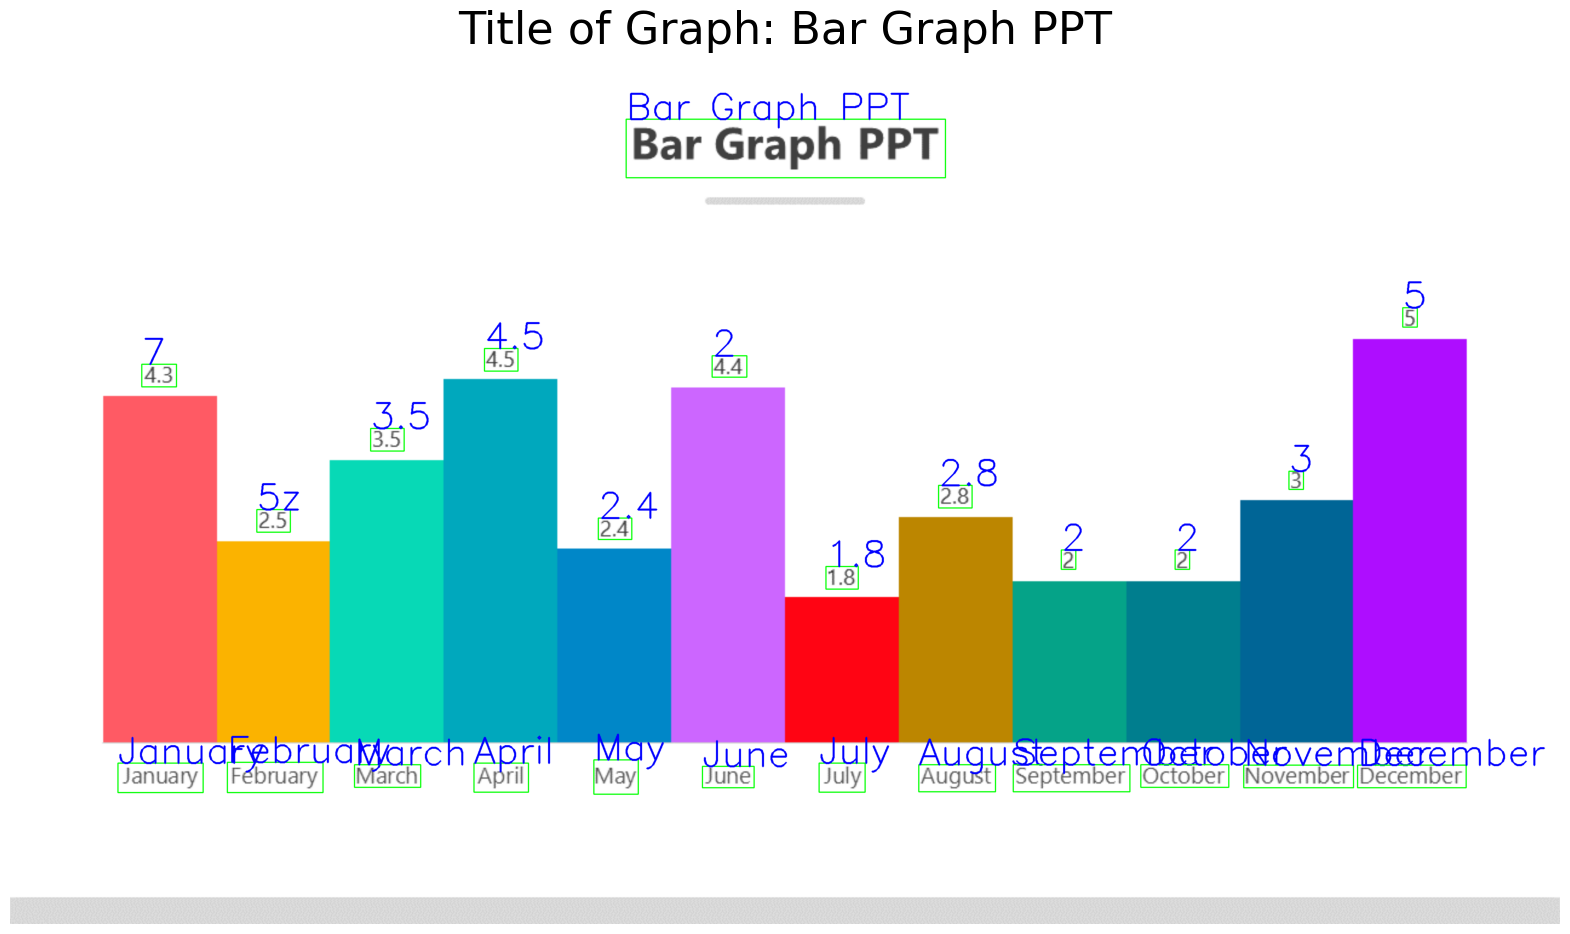

In [588]:
import cv2
import easyocr
from pathlib import Path
from matplotlib import pyplot as plt

# Load and upscale image to help identify smaller features
image_path = sample0
img = cv2.imread(str(image_path))
scale = 3
resized = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR_EXACT)

# convert to grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Apply CLAHE (adaptive contrast enhancement)
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# gray_clahe = clahe.apply(gray)

# # gaussian blur to remove noise
# blurred = cv2.GaussianBlur(gray_clahe, (3, 3), 0)

# blurred = cv2.adaptiveThreshold(gray_clahe, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                 cv2.THRESH_BINARY, 11, 2)

# Run EasyOCR
reader = easyocr.Reader(['en'], gpu=True)
results = reader.readtext(gray, 
                          contrast_ths=0.3, # try to improve recognizing small digits
                          adjust_contrast=0.5, 
                          paragraph=False,
                          decoder='beamsearch', # less greedy decoder; try to separate x-axis labels
                          width_ths=.35, # less aggressive merging of words
                          rotation_info=[90, 180 ,270]) # allow any possible rotation (good for y-axis)

# Draw bounding boxes
for (bbox, text, prob) in results:
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    cv2.rectangle(resized, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(resized, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 4)

resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

title = results[0][1]

# Display the image with bounding boxes
plt.figure(figsize=(20, 12))
plt.imshow(resized_rgb)
plt.axis('off')
plt.title(f'Title of Graph: {title}', fontsize=32)
bboxes_path = Path('./assets') / f'{image_path.stem}_bboxes{image_path.suffix}'
plt.savefig(bboxes_path, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [589]:
month_keywords = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
months = []
values = []

for result in results:
    (tl, tr, br, bl), text, pct = result
    lower_text = text.lower().strip()
    center_x = (tl[0] + br[0]) / 2
    center_y = (tl[1] + br[1]) / 2

    if any(m in lower_text for m in month_keywords):
        months.append((lower_text, center_x, center_y))
    elif any(c.isdigit() for c in text):
        values.append((text.strip(), center_x, center_y))

# sort by X position
months = sorted(months, key=lambda m: m[1])
values = sorted(values, key=lambda v: v[1])

In [590]:
values, months

([('7', 369.0, 801.0),
  ('5z', 652.5, 1161.0),
  ('3.5', 934.5, 960.0),
  ('4.5', 1216.5, 762.0),
  ('2.4', 1498.5, 1180.5),
  ('2', 1782.0, 778.5),
  ('1.8', 2061.0, 1302.0),
  ('2.8', 2341.5, 1101.0),
  ('2', 2622.0, 1257.0),
  ('2', 2904.0, 1257.0),
  ('3', 3186.0, 1060.5),
  ('5', 3468.0, 657.0)],
 [('january', 372.5, 1797.5),
  ('february', 656.5, 1796.5),
  ('march', 935.0, 1793.0),
  ('april', 1216.5, 1797.0),
  ('may', 1501.5, 1796.0),
  ('june', 1779.0, 1795.5),
  ('july', 2061.0, 1797.0),
  ('august', 2346.0, 1798.5),
  ('september', 2629.5, 1798.5),
  ('october', 2910.0, 1793.0),
  ('november', 3192.0, 1794.0),
  ('december', 3472.5, 1794.0)])

### Write out tabular data

In [591]:
import csv

# zip the two lists together
paired = zip(months, values)

# Path to save CSV
output_path = Path('./assets') / f'{image_path.stem}.csv'

# Write CSV
with open(output_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['month', 'value'])  # Column headers

    for (month_text, _, _), (value_text, _, _) in paired:
        writer.writerow([month_text.capitalize(), value_text])

## Text Extraction - Image_2

### Extract axes, values, titles

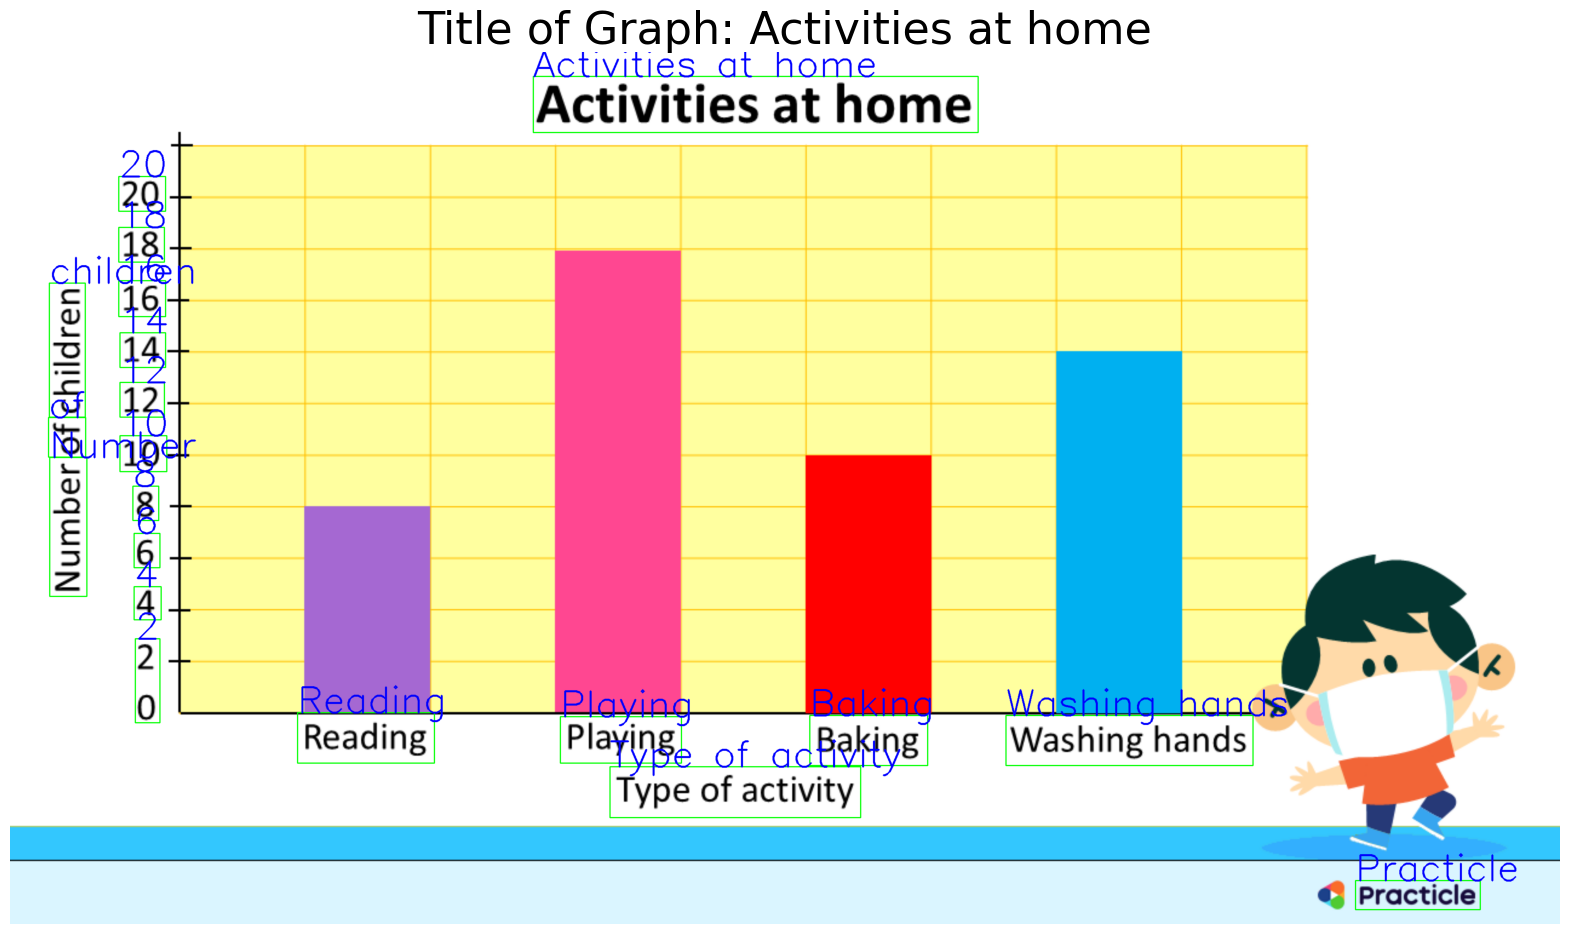

In [638]:
import cv2
import easyocr
from pathlib import Path
from matplotlib import pyplot as plt

# Load and upscale image to help identify smaller features
image_path = sample1
img = cv2.imread(str(image_path))
scale = 3
resized = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR_EXACT)

# convert to grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Apply CLAHE (adaptive contrast enhancement)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray_clahe = clahe.apply(gray)

# # gaussian blur to remove noise
blurred = cv2.GaussianBlur(gray_clahe, (3, 3), 0)

# blurred = cv2.adaptiveThreshold(gray_clahe, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                 cv2.THRESH_BINARY, 11, 2)

# Run EasyOCR
reader = easyocr.Reader(['en'], gpu=True)
results = reader.readtext(gray, 
                          contrast_ths=0.2, # try to improve recognizing small digits
                          adjust_contrast=0.5, 
                          paragraph=False,
                          decoder='beamsearch', # less greedy decoder; try to separate x-axis labels
                          width_ths=.35, # less aggressive merging of words
                          rotation_info=[270]) # allow any possible rotation (good for y-axis)

# Draw bounding boxes
for (bbox, text, prob) in results:
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    cv2.rectangle(resized, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(resized, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 4)

resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

title = results[0][1]

# Display the image with bounding boxes
plt.figure(figsize=(20, 12))
plt.imshow(resized_rgb)
plt.axis('off')
plt.title(f'Title of Graph: {title}', fontsize=32)
bboxes_path = Path('./assets') / f'{image_path.stem}_bboxes{image_path.suffix}'
plt.savefig(bboxes_path, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [641]:
numerical_vals = []
text_vals = []

for result in results:
    (tl, tr, br, bl), text, pct = result
    lower_text = text.lower().strip()
    center_x = (tl[0] + br[0]) / 2
    center_y = (tl[1] + br[1]) / 2

    if any(c.isdigit() for c in text):
        numerical_vals.append((text.strip(), center_x, center_y))
    else:
        text_vals.append((text.strip(), center_x, center_y))
    # if any(m in lower_text for m in month_keywords):
    #     months.append((lower_text, center_x, center_y))
    # elif any(c.isdigit() for c in text):
    #     values.append((text.strip(), center_x, center_y))

# get all the text at the bottom of the plot
bottom_text = sorted(text_vals, key=lambda t: t[2], reverse=True)[:2]

title = sorted(text_vals, key=lambda t: t[2], reverse=False)[0]

x_axis = sorted(bottom_text, key=lambda t: t[1])[0]
x_title = x_axis[0]

y_axis = sorted(y_axis, key=lambda v: v[2], reverse=True)
y_title = " ".join([i[0] for i in y_axis])

x_labels = []
for v in text_vals:
    if v == title:
        continue
    if v in y_axis:
        continue
    if v in bottom_text:
        continue

    x_labels.append(v)
x_labels = sorted(x_labels, key=lambda l: l[1])
y_vals = sorted(numerical_vals, key=lambda n: n[2])



In [643]:
x_title, y_title

('Type of activity', 'Number of children')

In [585]:
for v in y_vals:
    print(v)

('20', 327.0, 351.0)
('18', 325.5, 477.0)
('16', 327.0, 610.5)
('14', 328.5, 738.0)
('12', 327.0, 861.0)
('10', 330.0, 994.5)
('8', 336.0, 1117.5)
('6', 339.0, 1234.5)
('4', 340.5, 1365.0)
('2', 340.5, 1557.0)


### Extract bar dimensions and location

Try to locate and extract bar heights

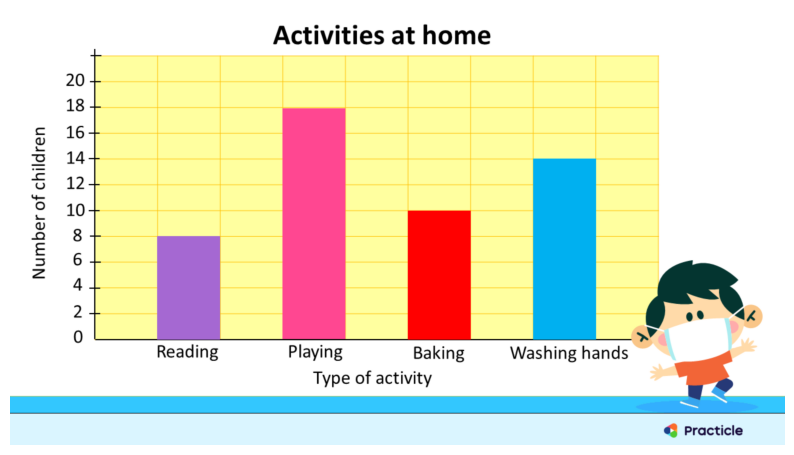

In [656]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

sample1 = Path('./assets/image_2.png')

image_path = sample1
img = cv2.imread(str(image_path))
scale = 3
resized = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

# Show result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

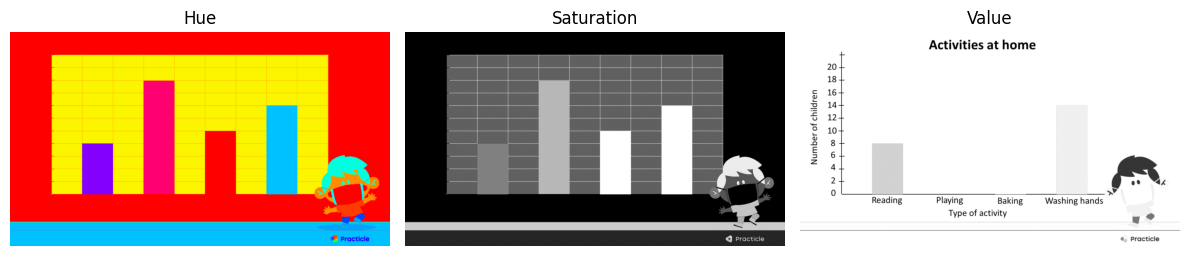

In [657]:
# convert to Hue Satruation and Value (HSV)
hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(H, cmap='hsv')
ax[0].set_title('Hue')
ax[0].axis('off')

ax[1].imshow(S, cmap='gray')
ax[1].set_title('Saturation')
ax[1].axis('off')

ax[2].imshow(V, cmap='gray')
ax[2].set_title('Value')
ax[2].axis('off')

plt.tight_layout()

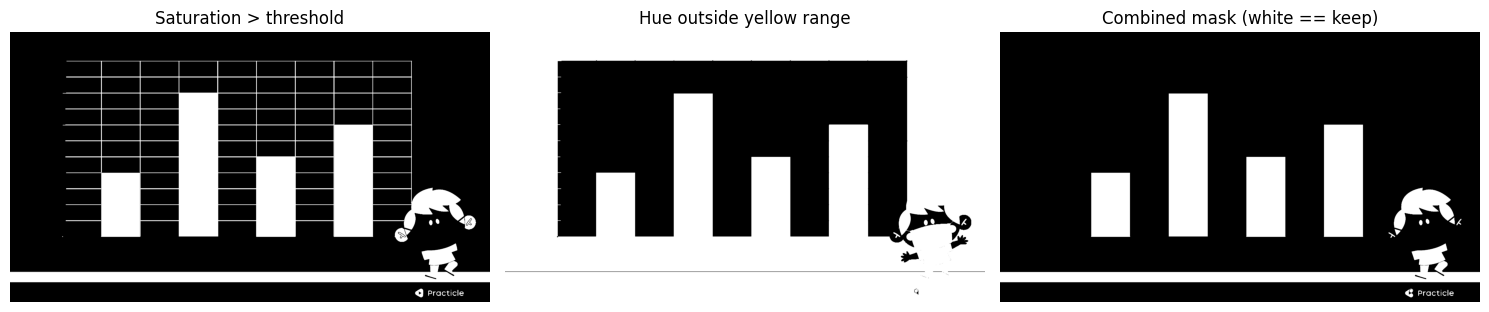

In [658]:
# Threshold for saturation and bounds for yellow hues (background to exclude)
sat_thresh = 110      
hue_low = 10   # lower end for yellow hues
hue_high = 45  # upper end for yellow hues

# Individual masks
mask_sat = S > sat_thresh                        # bright, saturated pixels
mask_hue = (H < hue_low) | (H > hue_high)        # exclude yellow hues
mask     = np.uint8(mask_sat & mask_hue) * 255   # combine and convert to binary image

# Show all three masks side-by-side
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(mask_sat, cmap='gray')
ax[0].set_title('Saturation > threshold')
ax[0].axis('off')

ax[1].imshow(mask_hue, cmap='gray')
ax[1].set_title('Hue outside yellow range')
ax[1].axis('off')

ax[2].imshow(mask, cmap='gray')
ax[2].set_title('Combined mask (white == keep)')
ax[2].axis('off')

plt.tight_layout()
plt.show()

In [659]:
countours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [660]:
countour_boxes = sorted(contours, key=lambda i: cv2.boundingRect(i)[0])

for c in countour_boxes:
    x, y, w, h = cv2.boundingRect(c)
    print(f"x: {x}, y: {y}\n   Area: {w*h}")

x: 0, y: 2005
   Area: 595200
x: 0, y: 0
   Area: 7365120
x: 3319, y: 1943
   Area: 3220
x: 3424, y: 1846
   Area: 13910


In [661]:
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

# mask_closed = cv2.morphologyEx(mask_raw, cv2.MORPH_CLOSE, kernel, iterations=2)
# mask_clean  = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN,  kernel, iterations=1)

# # --- compare before/after -------------------------------------------
# fig, ax = plt.subplots(1, 2, figsize=(10,4))
# ax[0].imshow(mask_raw,   cmap='gray'); ax[0].set_title('before'); ax[0].axis('off')
# ax[1].imshow(mask_clean, cmap='gray'); ax[1].set_title('after CLOSE + OPEN'); ax[1].axis('off')
# plt.tight_layout()

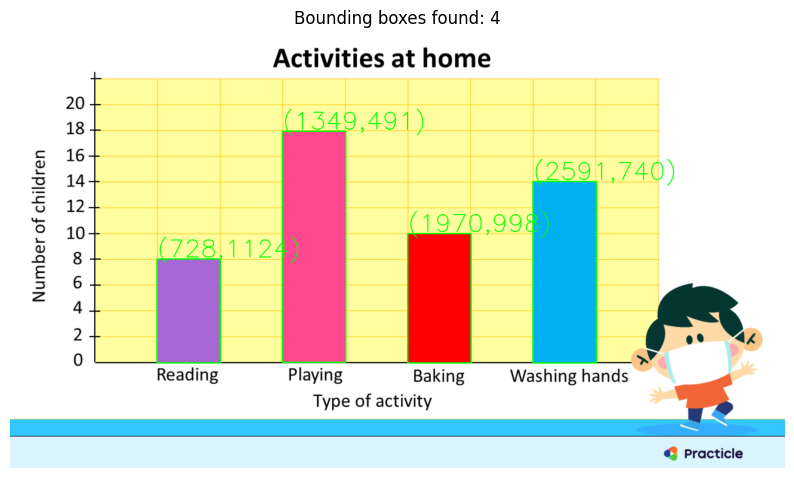

boxes (x, y, w, h):
(728, 1124, 314, 515)
   area: 161710
(1349, 491, 314, 1145)
   area: 359530
(1970, 998, 314, 641)
   area: 201274
(2591, 740, 314, 899)
   area: 282286


In [662]:
# visualize bounding boxes and coordinates

boxes_img = resized.copy()
boxes = []

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    area   = w * h
    aspect = w / h                   # width / height

    # keep only "tall, skinny, reasonably large" blobs  (adjust as needed)
    if area > 15000 and h > w:
        boxes.append((x, y, w, h))
        cv2.rectangle(boxes_img, (x, y), (x+w, y+h), (0, 255, 0), 5)
        cv2.putText(boxes_img, f"({x},{y})", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 4, (0,255,0), 3, cv2.LINE_AA)

# --- show the final result ------------------------------------------
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(boxes_img, cv2.COLOR_BGR2RGB))
plt.title(f'Bounding boxes found: {len(boxes)}')
plt.axis('off')
plt.show()

boxes = sorted(boxes, key=lambda b:b[0])

print("boxes (x, y, w, h):")
# for b in sorted(boxes, key=lambda b:b[0]):
for b in boxes:
    print(f"{b}\n   area: {b[2] * b[3]}")

### Write out tabular data

In [652]:
# get the value from the Y axis
for b in boxes:
    print(b[1])

for v in y_vals:
    print(v)

1124
491
998
740
('20', 327.0, 351.0)
('18', 325.5, 477.0)
('16', 327.0, 610.5)
('14', 328.5, 738.0)
('12', 327.0, 861.0)
('10', 330.0, 994.5)
('8', 336.0, 1117.5)
('6', 339.0, 1234.5)
('4', 340.5, 1365.0)
('2', 340.5, 1557.0)


In [653]:
x_labels

[('Reading', 881.5, 1698.5),
 ('Playing', 1513.0, 1703.5),
 ('Baking', 2127.0, 1705.0),
 ('Washing hands', 2773.0, 1705.0)]

In [654]:
# match bounding boxes Y value to nearst match in y_value axis list

csv_data = []
for bi, b in enumerate(boxes):
    y = b[1]
    last = 1e15
    my_idx = 0
    for i, v in enumerate(y_vals):
        this = abs(y - v[2])
        if this <= last:
            last = this
            my_idx = i
        
    print(f'label: {x_labels[bi][0]} y: {y}, v: {y_vals[my_idx][0]}')
    csv_data.append((x_labels[bi][0], y_vals[my_idx][0]))
    

label: Reading y: 1124, v: 8
label: Playing y: 491, v: 18
label: Baking y: 998, v: 10
label: Washing hands y: 740, v: 14


In [631]:
csv_data

[('Reading', '8'),
 ('Playing', '18'),
 ('Baking', '10'),
 ('Washing hands', '14')]

In [634]:
y_axis

[('Number', 144.0, 1176.0), ('of', 141.0, 954.0), ('children', 141.5, 738.0)]

In [655]:
import csv

# Path to save CSV
output_path = Path('./assets') / f'{image_path.stem}.csv'

# Write CSV
with open(output_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([x_title, y_title])  # Column headers

    writer.writerows(csv_data)

### Corner Detection

In [ ]:
con

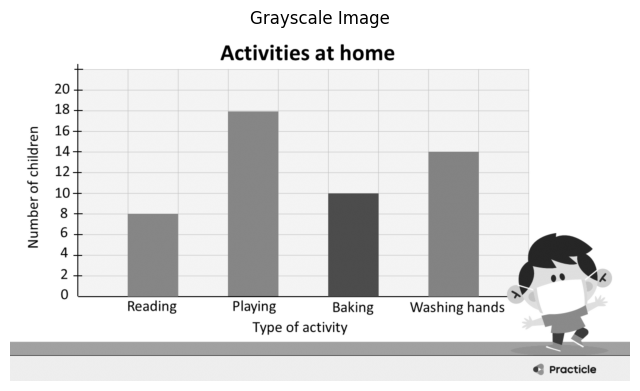

In [484]:
# Step 1: Convert to grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Visualize
plt.figure(figsize=(8, 5))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

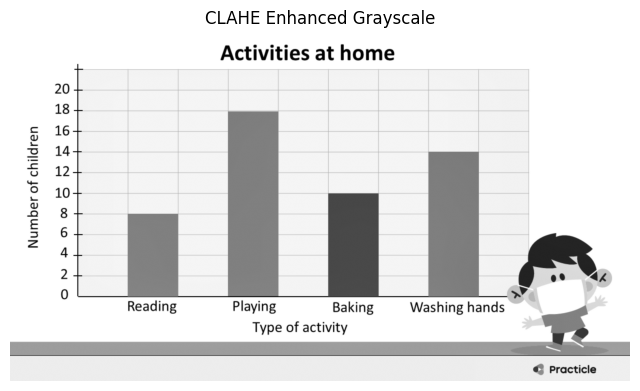

In [486]:
# Step 2: Apply CLAHE for contrast enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray_clahe = clahe.apply(gray)

# Visualize
plt.figure(figsize=(8, 5))
plt.imshow(gray_clahe, cmap='gray')
plt.title('CLAHE Enhanced Grayscale')
plt.axis('off')
plt.show()

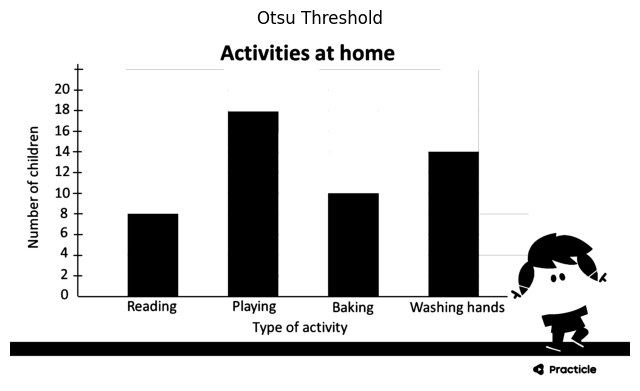

In [487]:
# Otsu's binarization
_, binary_otsu = cv2.threshold(gray_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Visualize
plt.figure(figsize=(8, 5))
plt.imshow(binary_otsu, cmap='gray')
plt.title('Otsu Threshold')
plt.axis('off')
plt.show()

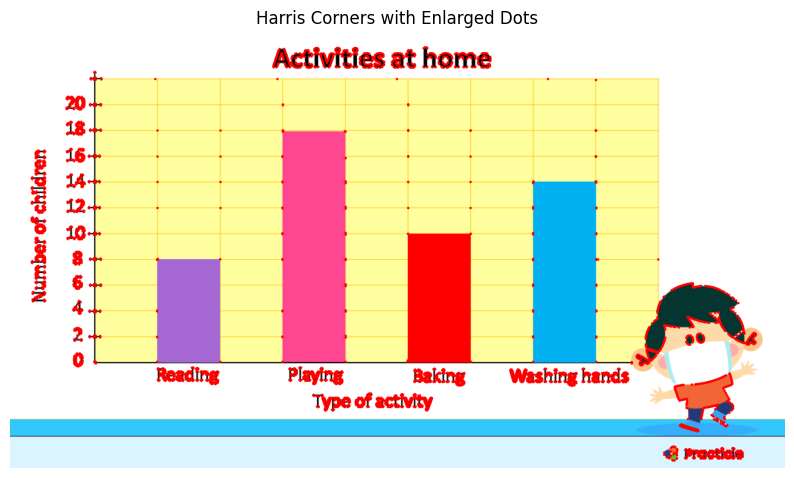

In [489]:
# Convert binary image to float32 for Harris
binary_float = np.float32(binary_otsu)

# Run Harris corner detection
harris = cv2.cornerHarris(binary_float, blockSize=2, ksize=3, k=0.04)

# Dilate to make corners more visible
harris_dilated = cv2.dilate(harris, None)

# Threshold to select strong corners
threshold = 0.01 * harris_dilated.max()
corner_mask = harris_dilated > threshold

# Create a copy to draw on
corner_vis = resized.copy()

# Draw larger red circles for each corner
ys, xs = np.where(corner_mask)
for x, y in zip(xs, ys):
    cv2.circle(corner_vis, (x, y), radius=4, color=(0, 0, 255), thickness=-1)

# Show result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(corner_vis, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners with Enlarged Dots')
plt.axis('off')
plt.show()

#### find contours

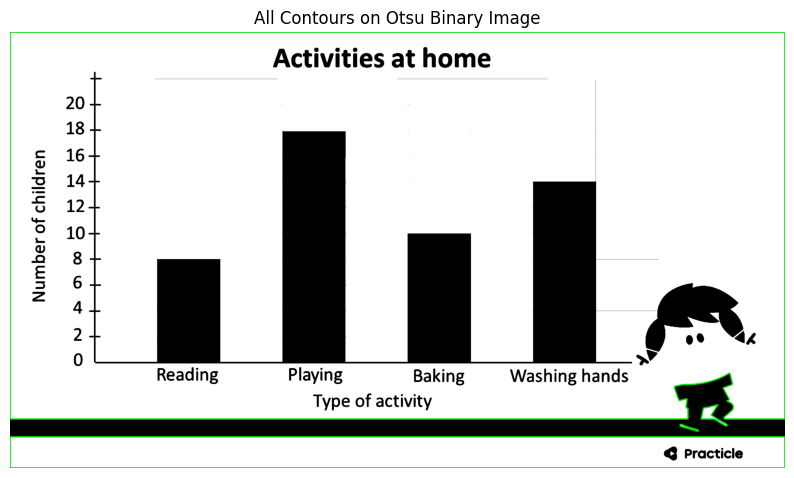

In [493]:
import cv2
import matplotlib.pyplot as plt

# Find external contours on the Otsu-thresholded image
contours, _ = cv2.findContours(binary_otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank color image to draw contours on (same size as binary_otsu)
contour_display = cv2.cvtColor(binary_otsu, cv2.COLOR_GRAY2BGR)

# Draw all contours in red
cv2.drawContours(contour_display, contours, -1, (0, 225, 0), 5)

# Show the result
plt.figure(figsize=(10, 6))
plt.imshow(contour_display)
plt.title('All Contours on Otsu Binary Image')
plt.axis('off')
plt.show()

### HSV Color Detection

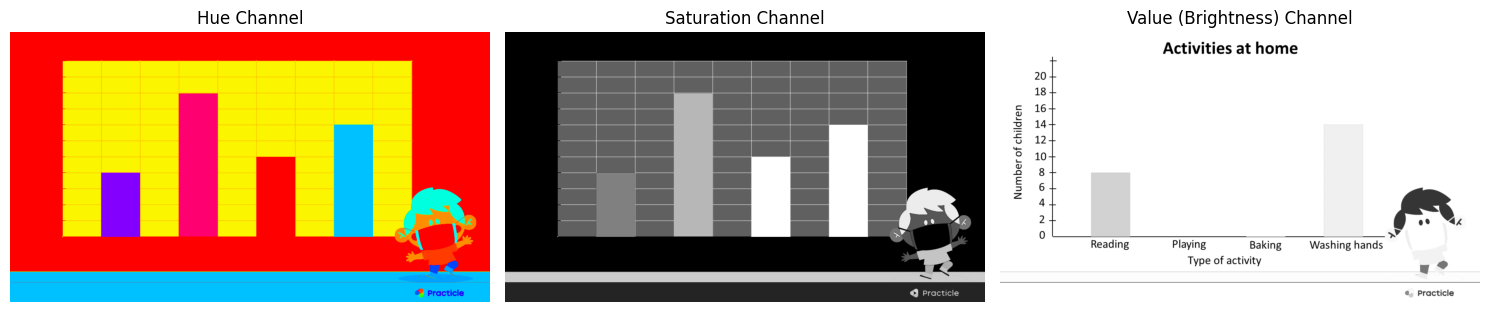

In [428]:
# Convert to HSV color space
hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# Visualize H, S, and V channels
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value (Brightness) Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

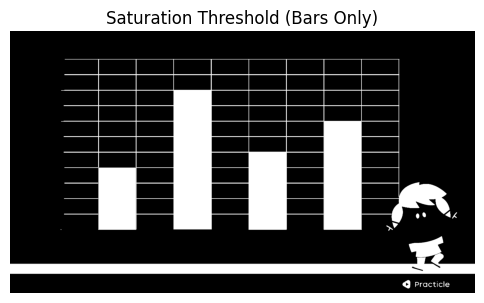

In [438]:
# Try to highlight the bars with enough saturation (120)
value, sat_thresh = cv2.threshold(s, 120, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.imshow(sat_thresh, cmap='gray')
plt.title('Saturation Threshold (Bars Only)')
plt.axis('off')
plt.show()

In [464]:
import pickle
from pathlib import Path

output_path = Path('detected_contours.pkl')

with open(output_path, 'wb') as f:
    pickle.dump(bar_rects, f)  # or dump(contours) if you prefer raw contours

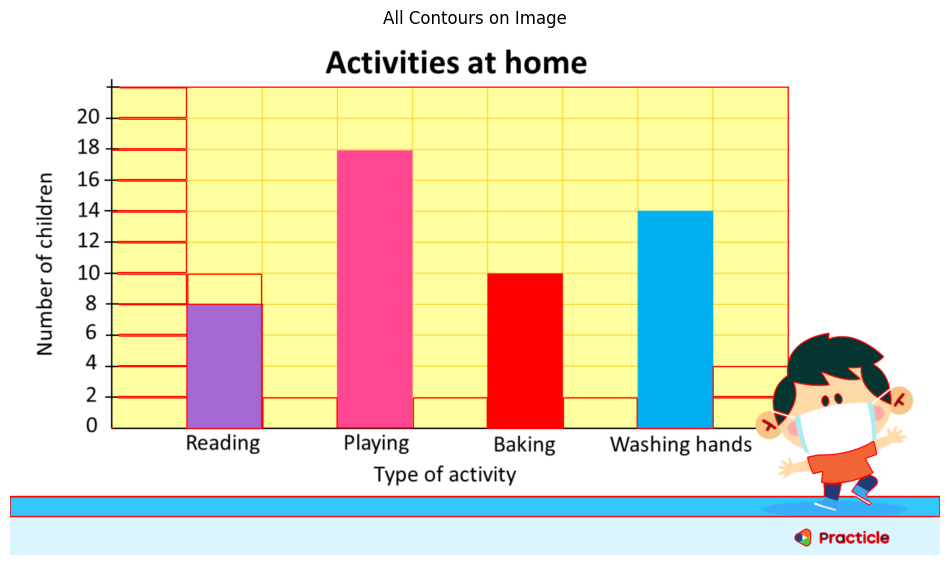

In [465]:
import cv2
import matplotlib.pyplot as plt

# Assuming `resized` is your 3x upscaled color image
# and `sat_thresh` is the thresholded mask from HSV

# Find contours
contours, _ = cv2.findContours(sat_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Make a copy of the image to draw on
contour_img = resized.copy()

# Draw all contours in red
cv2.drawContours(contour_img, contours, -1, (0, 0, 255), 3)

# Show the result
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('All Contours on Image')
plt.axis('off')
plt.show()

### Contour Detection

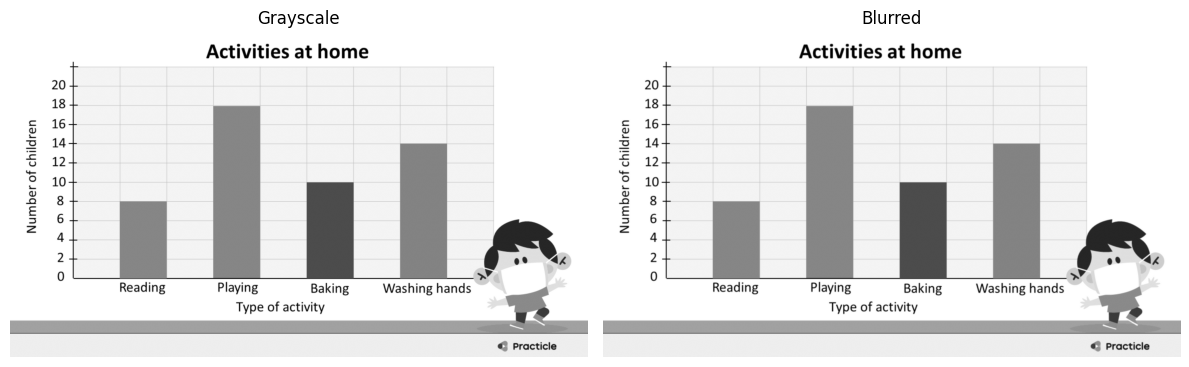

In [402]:
# Convert to grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred')
plt.axis('off')

plt.tight_layout()
plt.show()

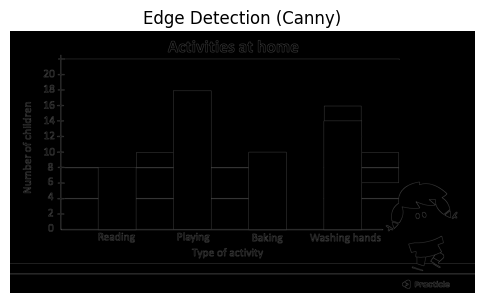

In [403]:
# Apply Canny edge detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Visualize
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')
plt.show()

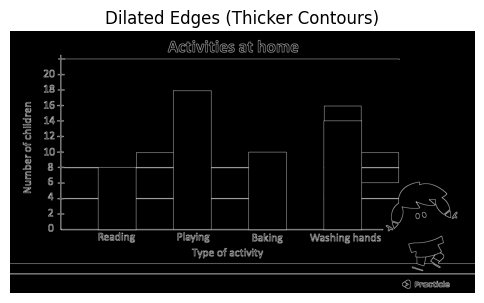

In [404]:
# Strengthen the edges with dilation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated = cv2.dilate(edges, kernel, iterations=1)

# Visualize
plt.figure(figsize=(6, 6))
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Edges (Thicker Contours)')
plt.axis('off')
plt.show()

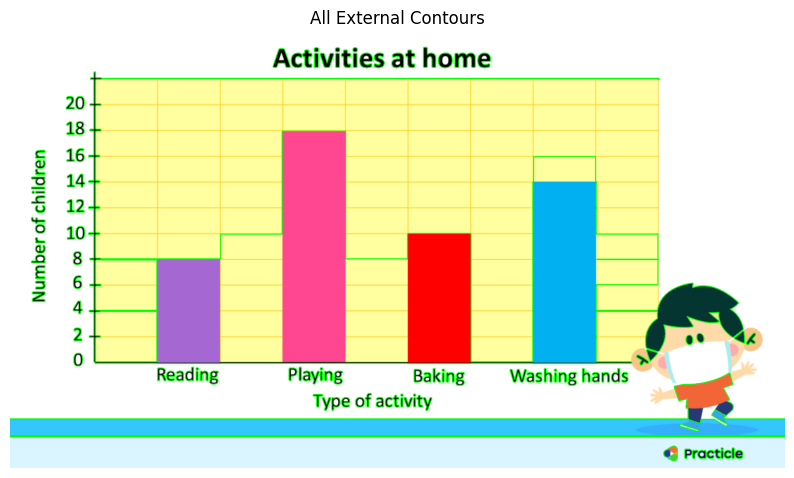

In [405]:
# Find external contours
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the image
contour_img = resized.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 4)

# Show result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('All External Contours')
plt.axis('off')
plt.show()

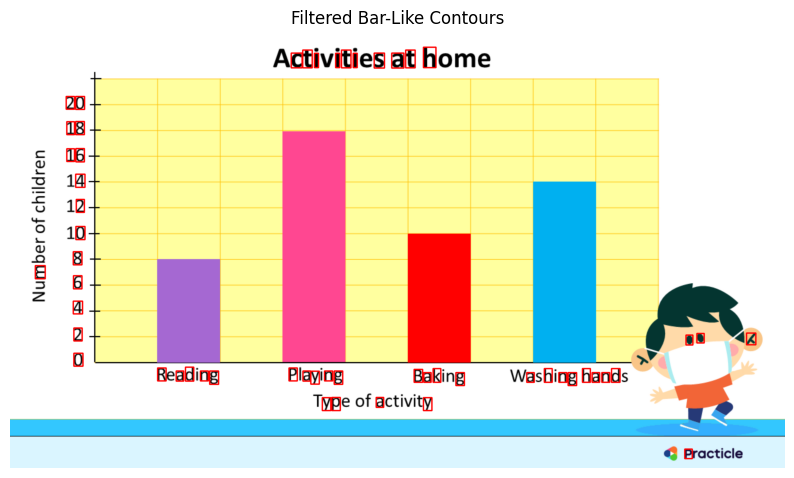

In [425]:
# Filter and draw rectangles around bar-like contours
bar_candidates = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = h / float(w)
    area = cv2.contourArea(cnt)

    # Heuristic: Tall and decently sized
    if 1.2 < aspect_ratio < 50 and area > 1000:
        bar_candidates.append((x, y, w, h))

# Draw bounding boxes on a copy
bars_img = resized.copy()
for (x, y, w, h) in bar_candidates:
    cv2.rectangle(bars_img, (x, y), (x + w, y + h), (0, 0, 255), 6)

# Visualize result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(bars_img, cv2.COLOR_BGR2RGB))
plt.title('Filtered Bar-Like Contours')
plt.axis('off')
plt.show()

### LAB Segmentation

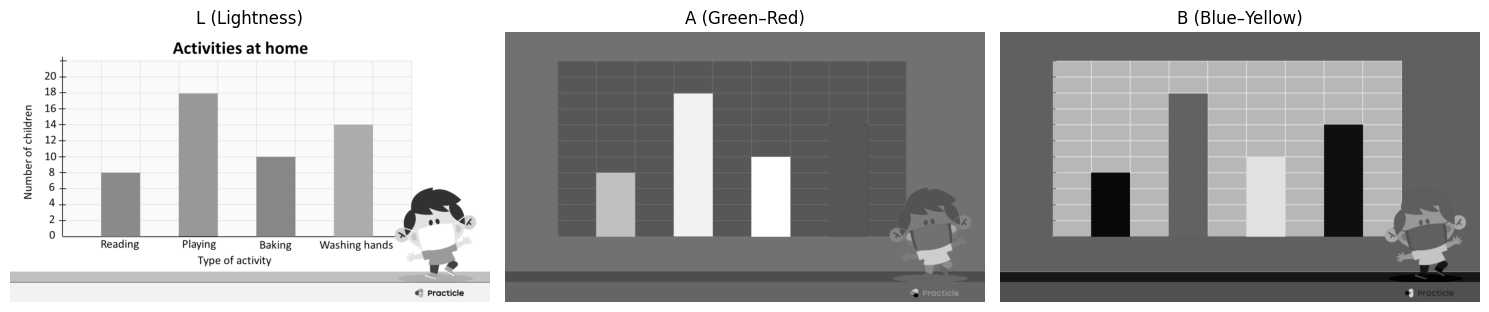

In [335]:
# Convert to LAB color space
lab = cv2.cvtColor(resized, cv2.COLOR_BGR2Lab)

# Split into L, A, B channels
l, a, b = cv2.split(lab)

# Visualize each channel
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(l, cmap='gray')
plt.title('L (Lightness)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(a, cmap='gray')
plt.title('A (Green–Red)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='gray')
plt.title('B (Blue–Yellow)')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Apply K-means clustering to try to extract regions

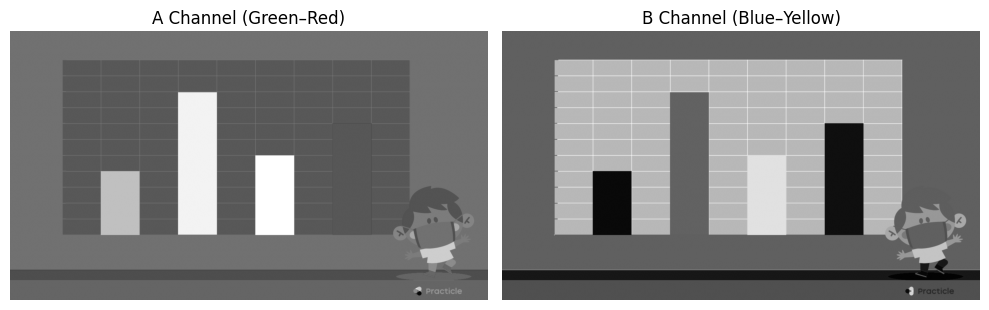

In [337]:
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

# Stack A and B channels and reshape to (num_pixels, 2)
ab = cv2.merge([a, b])
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(a, cmap='gray')
plt.title('A Channel (Green–Red)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(b, cmap='gray')
plt.title('B Channel (Blue–Yellow)')
plt.axis('off')

plt.tight_layout()
plt.show()

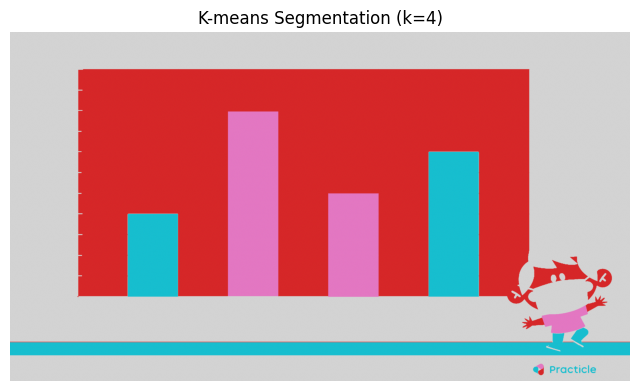

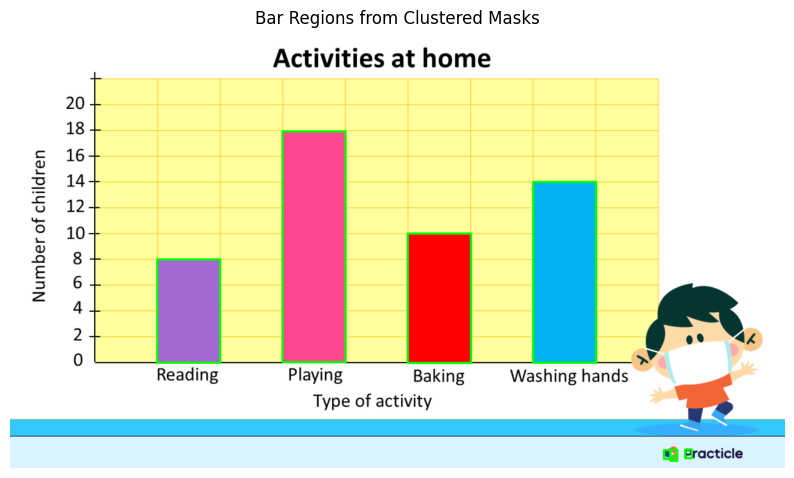

In [349]:
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors


# Convert image for KMeans
h, w = ab.shape[:2]
ab_2d = ab.reshape((-1, 2)).astype(np.float32) # make an array with the pixel values for each A and B channels

# Run KMeans
k = 4 # 12 months
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(ab_2d)
segmented = labels.reshape((h, w))

# Identify background label (most frequent)
unique, counts = np.unique(segmented, return_counts=True) # get rid of the background
background_label = unique[np.argmax(counts)]

# 4. Create a custom colormap with gray background
colors = plt.cm.tab10(np.linspace(0, 1, k))
colors[background_label] = mcolors.to_rgba('lightgray')
custom_cmap = mcolors.ListedColormap(colors)

# 5. Show segmented image
plt.figure(figsize=(8, 6))
plt.imshow(segmented, cmap=custom_cmap)
plt.title(f'K-means Segmentation (k={k})')
plt.axis('off')
plt.show()

# 6. Extract bar regions (ignore background)
bar_masks = []

for label in unique:
    if label == background_label:
        continue  # skip background

    mask = np.uint8(segmented == label) * 255
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = h / float(w)
        area = cv2.contourArea(cnt)

        if 1.2 < aspect_ratio < 12 and area > 500: # look for bar-like objects
            bar_masks.append((x, y, w, h))

# 7. Draw bar bounding boxes
bars_img = resized.copy()
for (x, y, w, h) in bar_masks:
    cv2.rectangle(bars_img, (x, y), (x + w, y + h), (0, 255, 0), 10)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(bars_img, cv2.COLOR_BGR2RGB))
plt.title('Bar Regions from Clustered Masks')
plt.axis('off')
plt.show()

In [350]:
bar_masks_sorted = sorted(bar_masks, key=lambda b: b[0])
bar_masks_sorted

[(729, 1126, 312, 512),
 (1350, 492, 312, 1143),
 (1970, 998, 314, 641),
 (2592, 742, 312, 896),
 (3240, 2071, 32, 43),
 (3271, 2069, 35, 55),
 (3345, 2068, 33, 43)]

### HSV Edge Detection

This fails because the red bar for July merges into the background

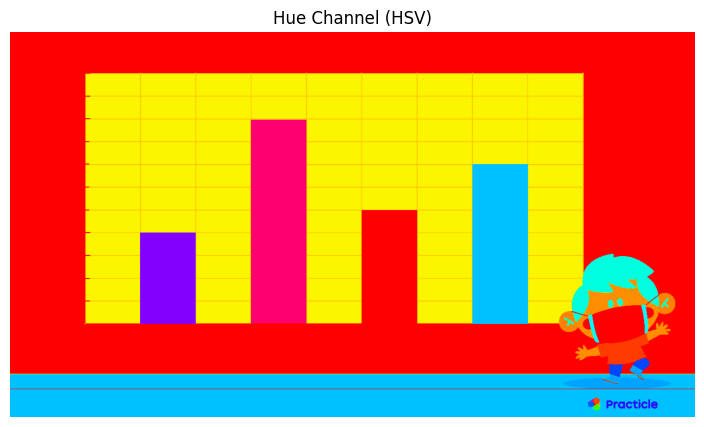

In [348]:
# Convert image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split HSV channels
h, s, v = cv2.split(hsv)

# Visualize Hue channel
plt.figure(figsize=(10, 5))
plt.imshow(h, cmap='hsv')
plt.title('Hue Channel (HSV)')
plt.axis('off')
plt.show()

### Grayscale Contour Detection

This fails because most of the bars get merged into two big blobs

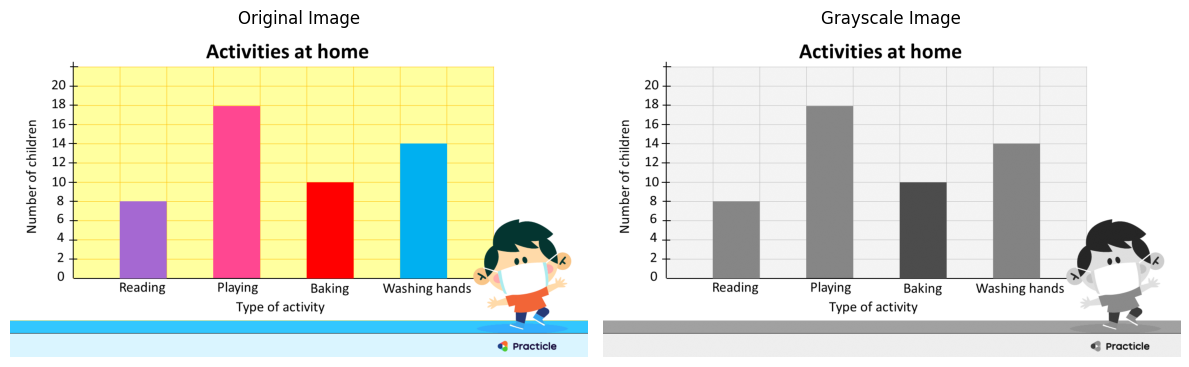

In [347]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Show original and grayscale side-by-side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()

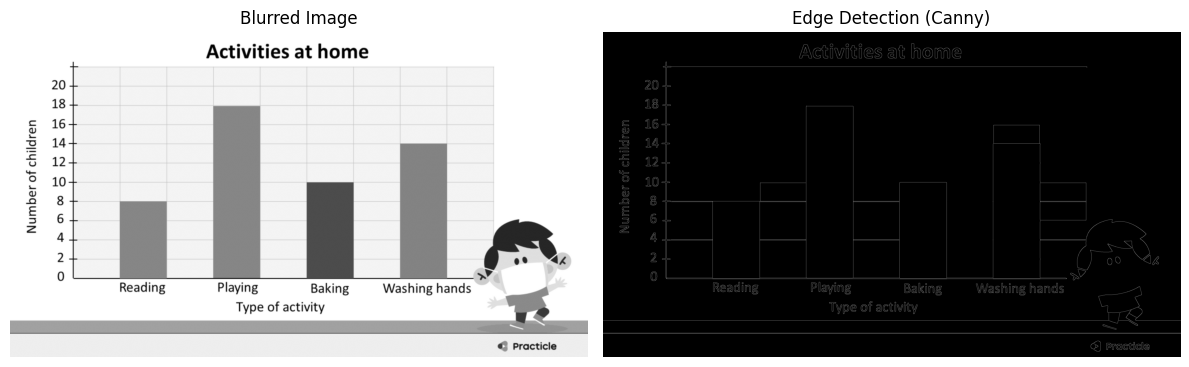

In [346]:
# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Show the blurred and edge-detected images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')

plt.tight_layout()
plt.show()